In [1]:
import hoomd
import gsd.hoomd 
from hoomd import md
import numpy as np
import matplotlib.pyplot as plt

box_length = 1000
radiusN = 105

hoomd.context.initialize("--mode=cpu")

HOOMD-blue 2.9.7 DOUBLE HPMC_MIXED TBB 
Compiled: 11/08/2021
Copyright (c) 2009-2019 The Regents of the University of Michigan.
-----
You are using HOOMD-blue. Please cite the following:
* J A Anderson, J Glaser, and S C Glotzer. "HOOMD-blue: A Python package for
  high-performance molecular dynamics and hard particle Monte Carlo
  simulations", Computational Materials Science 173 (2020) 109363
-----
HOOMD-blue is running on the CPU


In [2]:
energies = []
x_positions = np.linspace(-box_length / 2 + 200, box_length / 2 - 200, num=1000)
for x_position in x_positions:
    hoomd.context.initialize("--mode=cpu")
    snapshot = hoomd.data.make_snapshot(
    N=1, box=hoomd.data.boxdim(L=box_length, dimensions=3), 
    particle_types=['N'], bond_types=[], angle_types=[], 
    dihedral_types=[], improper_types=[], pair_types=[], 
    dtype='float')
    snapshot.particles.diameter[0] = 2.0 * radiusN
    snapshot.particles.position[0][0] = x_position
    system = hoomd.init.read_snapshot(snapshot)
    upper_wall_x = hoomd.md.wall.plane(origin=(box_length/2, 0, 0), normal=(-1, 0, 0), inside=True)
    lower_wall_x = hoomd.md.wall.plane(origin=(-box_length/2, 0, 0), normal=(1, 0, 0), inside=True)
    upper_wall_y = hoomd.md.wall.plane(origin=(0, box_length/2, 0), normal=(0, -1, 0), inside=True)
    lower_wall_y = hoomd.md.wall.plane(origin=(0, -box_length/2, 0), normal=(0, 1, 0), inside=True)
    upper_wall_z = hoomd.md.wall.plane(origin=(0, 0, box_length/2), normal=(0, 0, -1), inside=True)
    lower_wall_z = hoomd.md.wall.plane(origin=(0, 0, -box_length/2), normal=(0, 0, 1), inside=True)

    wall_group = hoomd.md.wall.group(upper_wall_x, lower_wall_x, 
                                     upper_wall_y, lower_wall_y, 
                                     upper_wall_z, lower_wall_z)
    wall_force = hoomd.md.wall.slj(wall_group, r_cut=radiusN*(2.0**(1.0/6.0)))
    wall_force.force_coeff.set('N', epsilon=1, sigma=radiusN, alpha=0,
                               r_cut=radiusN*(2.0**(1.0/6.0)))
    md.integrate.mode_standard(dt=0.0005)
    langevin = md.integrate.langevin(group=hoomd.group.all(), kT=1, seed=1)
    langevin.set_gamma("N", 0.001)
    log = hoomd.analyze.log(filename=None,
                            quantities=["potential_energy"],
                            period=1,
                            overwrite=True,
                            phase=-1)
    hoomd.run(0)
    energies.append(log.query("potential_energy"))

notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **


IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS nan | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **
notice(2): Group "all" created containing 1 particles
notice(2): Notice: slj set d_max=210.0
notice(2): integrate.langevin/bd is using specified gamma values


*Warning*: compute.thermo: given a group with 0 degrees of freedom.
            overriding ndof=1 to avoid divide by 0 errors


** starting run **
Time 00:00:00 | Step 0 / 0 | TPS 0 | ETA 00:00:00
Average TPS: 0
---------
** run complete **


In [3]:
def expected_function(x, box_length, rcut, delta, epsilon, sigma, alpha):
    return np.where(np.abs(x) < box_length / 2 - rcut - delta,
                    0.0,
                    4 * epsilon * (np.power(sigma / (box_length / 2 - np.abs(x) - delta), 12)
                                   - alpha * np.power(sigma / (box_length / 2 - np.abs(x) - delta), 6))
                    - 4 * epsilon * (np.power(sigma / rcut, 12)
                                     - alpha * np.power(sigma / rcut, 6)))

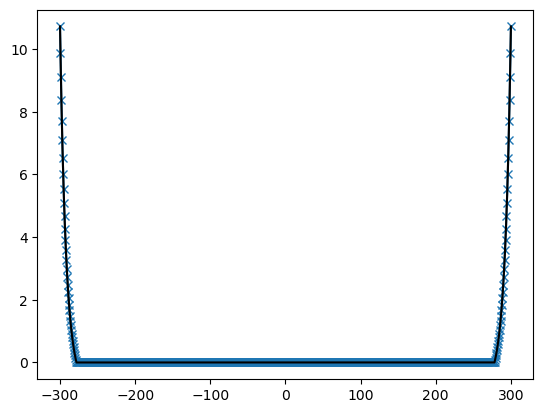

In [7]:
x_positions_exp = np.linspace(-box_length / 2 + 200, box_length / 2 - 200, num=10000)
pots = expected_function(x_positions_exp, box_length, radiusN*(2.0**(1.0/6.0)),
                         radiusN-1, 1, radiusN, 0)
plt.figure()
plt.plot(x_positions, energies, marker="x")
plt.plot(x_positions_exp, pots, color="k")
#plt.xlim(270, 300)
plt.show()
plt.close()